In [ ]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import re

1. Load Data

In [ ]:
data = pd.read_csv('/content/youtube-comments-penyerangan as terhadap penangkapan presiden maduro')
data.head()

,Date,user,comment,like
0,2026-01-09T12:11:50Z,@aldi07007,Cuma berani sama negara kecil😂,0
1,2026-01-09T11:18:23Z,@Redit9,Rakyat venezuela sudah muak sama presidennya y...,0
2,2026-01-09T10:50:01Z,@theguns1199,Amerika pikir2 mau nyerang indonesia karna di ...,0
3,2026-01-09T09:59:59Z,@christianproprey9687,Ini tindakan invasi,0
4,2026-01-09T05:14:54Z,@Darmawan-n9f,"Apakah presiden Venezuela akan di hukum mati, ...",0


In [ ]:
data = data[['Date', 'comment', 'like']]
data.dropna(subset=['comment'], inplace=True)
data.head()

,Date,comment,like
0,2026-01-09T12:11:50Z,Cuma berani sama negara kecil😂,0
1,2026-01-09T11:18:23Z,Rakyat venezuela sudah muak sama presidennya y...,0
2,2026-01-09T10:50:01Z,Amerika pikir2 mau nyerang indonesia karna di ...,0
3,2026-01-09T09:59:59Z,Ini tindakan invasi,0
4,2026-01-09T05:14:54Z,"Apakah presiden Venezuela akan di hukum mati, ...",0


2. Case folding

In [ ]:
data['casefolding'] = data['comment'].str.lower()
data.head()

,Date,comment,like,casefolding
0,2026-01-09T12:11:50Z,Cuma berani sama negara kecil😂,0,cuma berani sama negara kecil😂
1,2026-01-09T11:18:23Z,Rakyat venezuela sudah muak sama presidennya y...,0,rakyat venezuela sudah muak sama presidennya y...
2,2026-01-09T10:50:01Z,Amerika pikir2 mau nyerang indonesia karna di ...,0,amerika pikir2 mau nyerang indonesia karna di ...
3,2026-01-09T09:59:59Z,Ini tindakan invasi,0,ini tindakan invasi
4,2026-01-09T05:14:54Z,"Apakah presiden Venezuela akan di hukum mati, ...",0,"apakah presiden venezuela akan di hukum mati, ..."


Cleaning

In [ ]:
data['cleaning'] = data['casefolding'].apply(
    lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x)
)
data.head()

,Date,comment,like,casefolding,cleaning
0,2026-01-09T12:11:50Z,Cuma berani sama negara kecil😂,0,cuma berani sama negara kecil😂,cuma berani sama negara kecil
1,2026-01-09T11:18:23Z,Rakyat venezuela sudah muak sama presidennya y...,0,rakyat venezuela sudah muak sama presidennya y...,rakyat venezuela sudah muak sama presidennya y...
2,2026-01-09T10:50:01Z,Amerika pikir2 mau nyerang indonesia karna di ...,0,amerika pikir2 mau nyerang indonesia karna di ...,amerika pikir2 mau nyerang indonesia karna di ...
3,2026-01-09T09:59:59Z,Ini tindakan invasi,0,ini tindakan invasi,ini tindakan invasi
4,2026-01-09T05:14:54Z,"Apakah presiden Venezuela akan di hukum mati, ...",0,"apakah presiden venezuela akan di hukum mati, ...",apakah presiden venezuela akan di hukum mati ...


3. Tokenisasi

In [ ]:
nltk.download('punkt_tab')
data['tokenisasi'] = data['cleaning'].apply(word_tokenize)
data.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Date,comment,like,casefolding,cleaning,tokenisasi
0,2026-01-09T12:11:50Z,Cuma berani sama negara kecil😂,0,cuma berani sama negara kecil😂,cuma berani sama negara kecil,"[cuma, berani, sama, negara, kecil]"
1,2026-01-09T11:18:23Z,Rakyat venezuela sudah muak sama presidennya y...,0,rakyat venezuela sudah muak sama presidennya y...,rakyat venezuela sudah muak sama presidennya y...,"[rakyat, venezuela, sudah, muak, sama, preside..."
2,2026-01-09T10:50:01Z,Amerika pikir2 mau nyerang indonesia karna di ...,0,amerika pikir2 mau nyerang indonesia karna di ...,amerika pikir2 mau nyerang indonesia karna di ...,"[amerika, pikir2, mau, nyerang, indonesia, kar..."
3,2026-01-09T09:59:59Z,Ini tindakan invasi,0,ini tindakan invasi,ini tindakan invasi,"[ini, tindakan, invasi]"
4,2026-01-09T05:14:54Z,"Apakah presiden Venezuela akan di hukum mati, ...",0,"apakah presiden venezuela akan di hukum mati, ...",apakah presiden venezuela akan di hukum mati ...,"[apakah, presiden, venezuela, akan, di, hukum,..."


Normalisasi kata tidak baku

In [ ]:
normalisasi_dict = {
    'gk': 'tidak',
    'ga': 'tidak',
    'nggak': 'tidak',
    'tdk': 'tidak',
    'bgt': 'banget',
    'pdhl': 'padahal',
    'aja': 'saja',
    'krn': 'karena',
    'yg': 'yang'
}

def normalisasi(tokens):
    return [normalisasi_dict.get(word, word) for word in tokens]

data['tokenisasi'] = data['tokenisasi'].apply(normalisasi)

4. Stop Word

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

custom_stopwords = {
    'nya', 'lah', 'kah', 'pun', 'dong', 'deh', 'kok',
    'sih', 'tuh', 'ya', 'nih', 'eh'
}

stop_words = stop_words.union(custom_stopwords)

data['stopword'] = data['tokenisasi'].apply(
    lambda x: [word for word in x if word not in stop_words]
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


menghapus kata dengan panjang sangat dikit (1 sampai 2 huruf)

In [ ]:
data['stopword'] = data['stopword'].apply(
    lambda x: [word for word in x if len(word) > 2]
)

5. Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data['stemming'] = data['stopword'].apply(
    lambda x: [stemmer.stem(word) for word in x]
)
data.head()

,Date,comment,like,casefolding,cleaning,tokenisasi,stopword,stemming
0,2026-01-09T12:11:50Z,Cuma berani sama negara kecil😂,0,cuma berani sama negara kecil😂,cuma berani sama negara kecil,"[cuma, berani, sama, negara, kecil]","[berani, negara]","[berani, negara]"
1,2026-01-09T11:18:23Z,Rakyat venezuela sudah muak sama presidennya y...,0,rakyat venezuela sudah muak sama presidennya y...,rakyat venezuela sudah muak sama presidennya y...,"[rakyat, venezuela, sudah, muak, sama, preside...","[rakyat, venezuela, muak, presidennya, korup, ...","[rakyat, venezuela, muak, presiden, korup, neg..."
2,2026-01-09T10:50:01Z,Amerika pikir2 mau nyerang indonesia karna di ...,0,amerika pikir2 mau nyerang indonesia karna di ...,amerika pikir2 mau nyerang indonesia karna di ...,"[amerika, pikir2, mau, nyerang, indonesia, kar...","[amerika, pikir2, nyerang, indonesia, karna, t...","[amerika, pikir2, nyerang, indonesia, karna, t..."
3,2026-01-09T09:59:59Z,Ini tindakan invasi,0,ini tindakan invasi,ini tindakan invasi,"[ini, tindakan, invasi]","[tindakan, invasi]","[tindak, invasi]"
4,2026-01-09T05:14:54Z,"Apakah presiden Venezuela akan di hukum mati, ...",0,"apakah presiden venezuela akan di hukum mati, ...",apakah presiden venezuela akan di hukum mati ...,"[apakah, presiden, venezuela, akan, di, hukum,...","[presiden, venezuela, hukum, mati, halny, pres...","[presiden, venezuela, hukum, mati, halny, pres..."


In [ ]:
data['text_clean'] = data['stemming'].apply(lambda x: ' '.join(x))
data_clean = data[['Date', 'comment', 'text_clean', 'like']]
data_clean.head()

,Date,comment,text_clean,like
0,2026-01-09T12:11:50Z,Cuma berani sama negara kecil😂,berani negara,0
1,2026-01-09T11:18:23Z,Rakyat venezuela sudah muak sama presidennya y...,rakyat venezuela muak presiden korup negara mi...,0
2,2026-01-09T10:50:01Z,Amerika pikir2 mau nyerang indonesia karna di ...,amerika pikir2 nyerang indonesia karna tni pas...,0
3,2026-01-09T09:59:59Z,Ini tindakan invasi,tindak invasi,0
4,2026-01-09T05:14:54Z,"Apakah presiden Venezuela akan di hukum mati, ...",presiden venezuela hukum mati halny presiden irak,0


menghapus data kosong

In [ ]:
data = data[data['text_clean'].str.strip() != '']
data.dropna(subset=['text_clean'], inplace=True)

/tmp/ipython-input-2085387748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['text_clean'], inplace=True)


In [ ]:
data_clean.to_excel('data clean.xlsx', index=False)

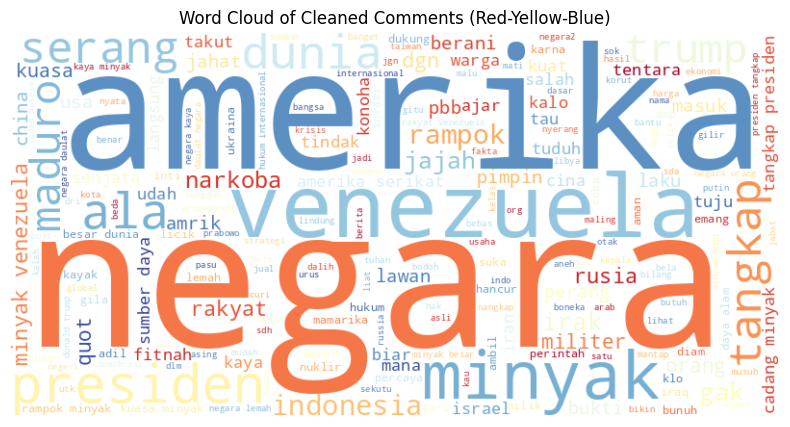

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the cleaned text into a single string
all_text = ' '.join(data_clean['text_clean'])

# Generate word cloud with a red-yellow-blue colormap
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdYlBu').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Comments (Red-Yellow-Blue)')
plt.show()

In [ ]:
from nltk.probability import FreqDist

all_words = ' '.join(data_clean['text_clean']).split()
freq_dist = FreqDist(all_words)

print("10 Kata Paling Sering Muncul:")
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

10 Kata Paling Sering Muncul:
negara: 543
minyak: 386
amerika: 384
venezuela: 310
presiden: 219
tangkap: 175
dunia: 163
alas: 149
trump: 113
rampok: 111
